# [IT Academy - Data Science with Python](https://www.barcelonactiva.cat/es/itacademy)
## S15 T01: Unsupervised Classification
### [Github Advanced Machine Learning](https://github.com/jesussantana/Unsupervised-Classification)
[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Unsupervised-Classification.svg)](https://wakatime.com/badge/github/jesussantana/Unsupervised-Classification)

## Auto Import Python Libraries

https://pypi.org/project/pyforest/

In [1]:
#%pip install --upgrade pyforest
#!python -m pyforest install_extensions

In [2]:
# Import Dependencies
# ==============================================================================

from pyforest import *

In [3]:
# Check imported dependencies
lazy_imports()

['from sklearn.preprocessing import RobustScaler',
 'from sklearn.ensemble import RandomForestClassifier',
 'import os',
 'import pickle',
 'from sklearn.preprocessing import StandardScaler',
 'import xgboost as xgb',
 'from sklearn.linear_model import ElasticNetCV',
 'import keras',
 'import textblob',
 'import fastai',
 'import cv2',
 'import seaborn as sns',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.impute import SimpleImputer',
 'from sklearn import svm',
 'import pydot',
 'from scipy import signal as sg',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import gensim',
 'from sklearn.linear_model import Lasso',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import tqdm',
 'import imutils',
 'import awswrangler as wr',
 'import nltk',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.model_selection import StratifiedKFold',
 'import re',
 'import statsmodels.a

In [4]:
# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Classify the different flights

### Exercise 1: 
  - Classify the different flights using the K-means algorithm.


### Exercise 2: 
  - Classify the different flights using the hierarchical clustering algorithm.


### Exercise 3: 
  - Calculate clustering performance using a parameter such as silhouette.

In [5]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

<IPython.core.display.Javascript object>

In [6]:
df = df_raw.copy()

## Exploratory analysis

In [7]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [10]:
df.shape

(1936758, 29)

In [11]:
df.isna().sum().sort_values()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
Distance                  0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
Dest                      0
Diverted                  0
Origin                    0
CancellationCode          0
Cancelled                 0
DepDelay                  0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
ArrDelay               8387
AirTime                8387
ActualElapsedTime      8387
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

### Sample Dataset to be able to work with him

In [12]:
df = df.sample(frac=0.001, random_state = 6858)
df.to_csv(path + "interim/DelayedFlights_Sample.csv", index = False, header = True)

### Drop features that we do not adds value

In [13]:
df.drop(axis=1,columns=['Year','Cancelled','CancellationCode','TailNum','FlightNum'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 32721 to 693767
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              1937 non-null   int64  
 1   DayofMonth         1937 non-null   int64  
 2   DayOfWeek          1937 non-null   int64  
 3   DepTime            1937 non-null   float64
 4   CRSDepTime         1937 non-null   int64  
 5   ArrTime            1931 non-null   float64
 6   CRSArrTime         1937 non-null   int64  
 7   UniqueCarrier      1937 non-null   object 
 8   ActualElapsedTime  1931 non-null   float64
 9   CRSElapsedTime     1937 non-null   float64
 10  AirTime            1931 non-null   float64
 11  ArrDelay           1931 non-null   float64
 12  DepDelay           1937 non-null   float64
 13  Origin             1937 non-null   object 
 14  Dest               1937 non-null   object 
 15  Distance           1937 non-null   int64  
 16  TaxiIn            

In [15]:
df.shape

(1937, 24)

In [16]:
df.isna().sum()

Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime                6
CRSArrTime             0
UniqueCarrier          0
ActualElapsedTime      6
CRSElapsedTime         0
AirTime                6
ArrDelay               6
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn                 6
TaxiOut                1
Diverted               0
CarrierDelay         668
WeatherDelay         668
NASDelay             668
SecurityDelay        668
LateAircraftDelay    668
dtype: int64

## Distribution of the response variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

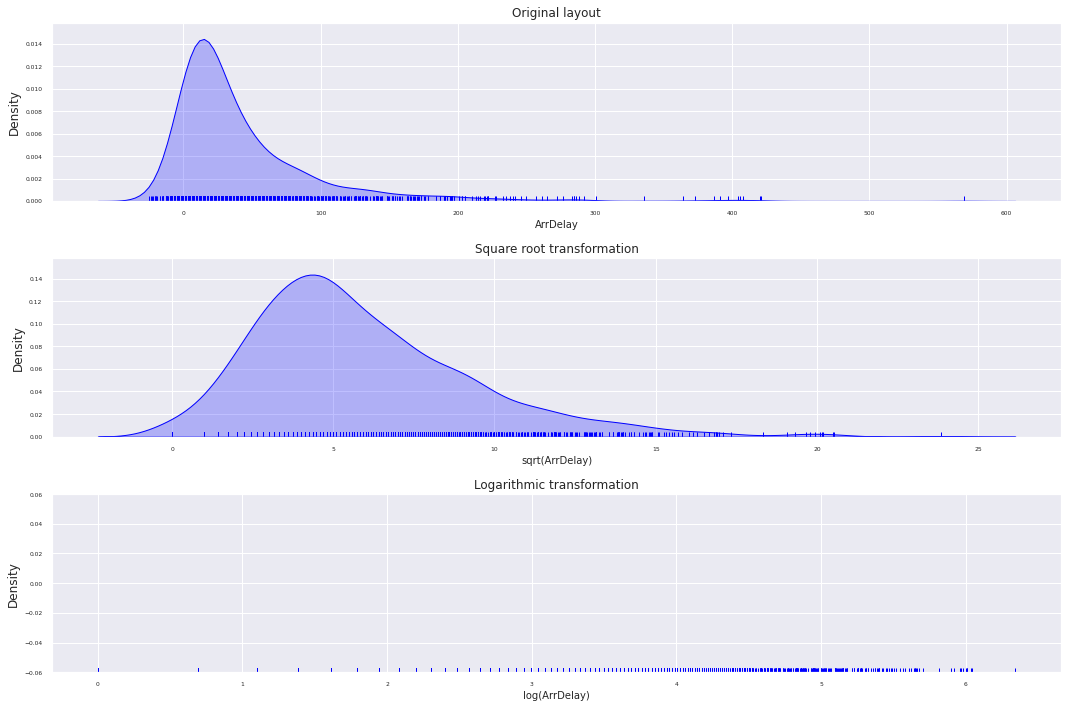

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrDelay', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrDelay)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrDelay)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Response_Variable.png")

## Numerical variables

In [19]:
df.select_dtypes(include=['float64', 'int']).describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1937.000000,1937.000000,1937.000000,1937.000000,1937.000000,1931.000000,1937.000000,1931.000000,1937.000000,1931.000000,1931.000000,1937.000000,1937.000000,1931.000000,1936.000000,1937.000000,1269.000000,1269.000000,1269.000000,1269.000000,1269.000000
mean,6.188436,15.639649,3.979350,1525.729995,1472.326794,1619.844640,1642.601962,130.874676,132.051110,106.201968,42.473848,43.697470,749.701600,6.686173,18.018595,0.002581,18.381403,4.008668,15.340426,0.043341,24.799842
std,3.526773,8.625306,1.954701,446.757172,421.887079,549.546968,463.584889,70.309750,69.969208,67.079109,56.640112,53.677347,569.053389,4.469692,13.465994,0.050754,42.626851,20.647043,36.475965,0.923158,42.242719
min,1.000000,1.000000,1.000000,6.000000,10.000000,2.000000,1.000000,32.000000,30.000000,14.000000,-25.000000,6.000000,45.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,1216.000000,1145.000000,1334.000000,1345.000000,78.000000,80.000000,56.000000,9.000000,12.000000,334.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,16.000000,4.000000,1550.000000,1511.000000,1730.000000,1715.000000,113.000000,115.000000,88.000000,24.000000,24.000000,594.000000,6.000000,14.000000,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000
75%,9.000000,23.000000,5.000000,1854.000000,1820.000000,2029.500000,2010.000000,161.000000,161.000000,134.000000,55.000000,53.000000,984.000000,8.000000,21.000000,0.000000,19.000000,0.000000,14.000000,0.000000,33.000000
max,12.000000,31.000000,7.000000,2356.000000,2359.000000,2359.000000,2359.000000,441.000000,419.000000,370.000000,569.000000,571.000000,3329.000000,44.000000,137.000000,1.000000,569.000000,285.000000,421.000000,25.000000,387.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

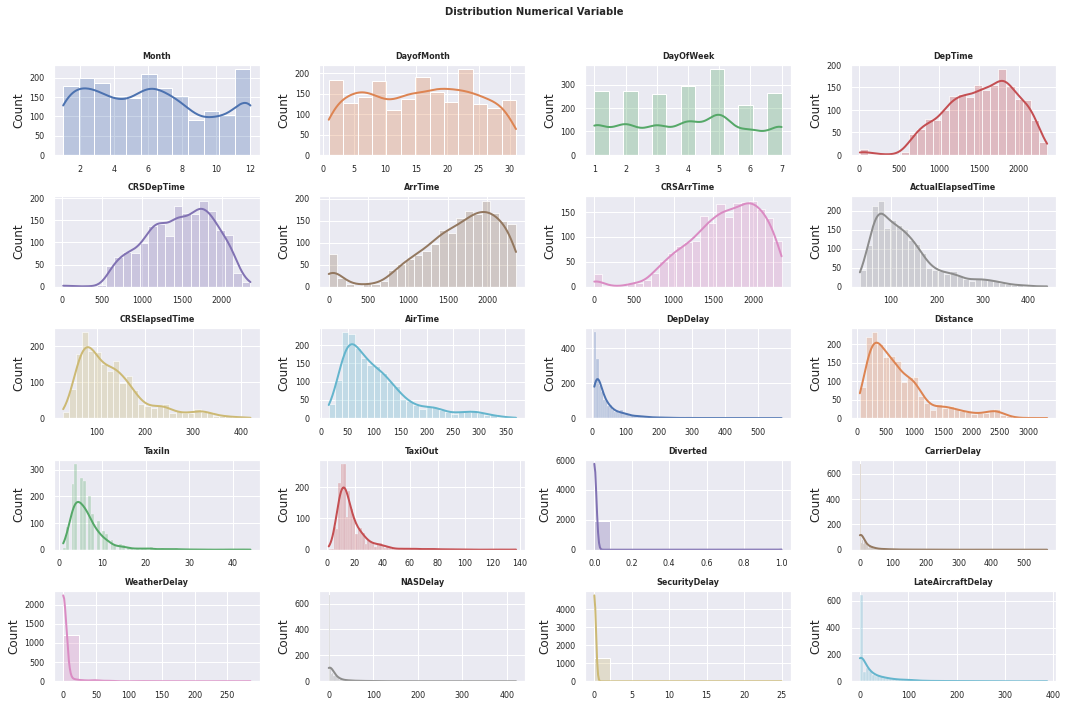

In [20]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png")

In [21]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Empty axes are removed
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 10, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'ticker' is not defined

In [ ]:
### We can observe a strong correlation with DepDelay